In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import fastf1 
import optuna
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import sys

sys.path.append('..')
##sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
from telemetry.telemetry_data_preprocessing import telemetry_computations
from loader import load_telemetry
from telemetry.telemetry_data_preprocessing import TelemetryProcessing

In [ ]:
folder_path = '../data_telemetry'

final_lap_data = pd.DataFrame()

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):  
        
        
        telemetry = pd.DataFrame(load_telemetry(f"{folder_path}/{filename}"))
        
        tel = TelemetryProcessing(telemetry)
        
        tel.normalize_drs()
        tel.compute_accelerations()
        tel.calculate_lap_progress()

        single_lap_data = tel.get_single_lap_data()
        
        
        final_lap_data = pd.concat([final_lap_data, single_lap_data], axis=1)
        
        print(f"loaded and processed {filename} data...")
        
final_lap_data

c:\Users\Patryk\OneDrive\Pulpit\STUDIA AGH\SEM1\EKSPLORACJA DANYCH\proj\F1_dataExploration\telemetry\..\telemetry\telemetry_data_preprocessing.py:190: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, final_row], axis=0)


loaded and processed Abu Dhabi.pkl data...


c:\Users\Patryk\OneDrive\Pulpit\STUDIA AGH\SEM1\EKSPLORACJA DANYCH\proj\F1_dataExploration\telemetry\..\telemetry\telemetry_data_preprocessing.py:190: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, final_row], axis=0)


loaded and processed Australia.pkl data...


c:\Users\Patryk\OneDrive\Pulpit\STUDIA AGH\SEM1\EKSPLORACJA DANYCH\proj\F1_dataExploration\telemetry\..\telemetry\telemetry_data_preprocessing.py:190: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, final_row], axis=0)


loaded and processed Austria.pkl data...


c:\Users\Patryk\OneDrive\Pulpit\STUDIA AGH\SEM1\EKSPLORACJA DANYCH\proj\F1_dataExploration\telemetry\..\telemetry\telemetry_data_preprocessing.py:190: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, final_row], axis=0)


loaded and processed Azerbaijan.pkl data...


KeyboardInterrupt: 

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,lon_acc,lat_acc,abs_lat_acc,abs_lon_acc,sum_lat_acc,sum_lon_acc,TimeNumberLapTime,TimeNumberLapCounts,LapProgress,RaceName
698,2023-11-26 13:04:58.090,0 days 01:03:56.965000,,2.266667,0 days 00:01:32.446000,11477.103883,224.716663,5,100.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1394,2023-11-26 13:06:28.800,0 days 01:05:27.675000,,NaN,0 days 00:01:30.710000,11471.610644,219.892855,5,100.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2094,2023-11-26 13:07:59.208,0 days 01:06:58.083000,,NaN,0 days 00:01:30.408000,11230.716614,220.916665,5,100.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2787,2023-11-26 13:09:29.924,0 days 01:08:28.799000,,NaN,0 days 00:01:30.716000,11373.697133,221.924998,5,100.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3483,2023-11-26 13:11:00.476,0 days 01:09:59.351000,,NaN,0 days 00:01:30.552000,11331.388889,220.222222,5,100.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812592,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813217,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813840,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814446,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
telemetry.head(5)

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,LapNumber,lon_acc,lat_acc,abs_lat_acc,abs_lon_acc,sum_lat_acc,sum_lon_acc,TimeNumberLapTime,TimeNumberLapCounts,LapProgress
0,2023-10-08 17:03:33.776,0 days 01:02:33.771000,,0.441667,0 days 00:00:00,10120.590036,0.000000,1,14.0,True,...,1.0,0.00000,0.00000,0.00000,0.00000,988.54503,487.39265,1,833,0.001200
1,2023-10-08 17:03:33.950,0 days 01:02:33.945000,,0.441667,0 days 00:00:00.174000,10071.000000,0.000000,1,14.0,True,...,1.0,0.00000,0.00000,0.00000,0.00000,988.54503,487.39265,2,833,0.002401
2,2023-10-08 17:03:34.020,0 days 01:02:34.015000,,0.441667,0 days 00:00:00.244000,10052.625034,0.000000,1,14.0,True,...,1.0,0.00000,0.00000,0.00000,0.00000,988.54503,487.39265,3,833,0.003601
3,2023-10-08 17:03:34.190,0 days 01:02:34.185000,22,0.441667,0 days 00:00:00.414000,10008.000000,0.000000,1,14.0,False,...,1.0,0.43702,0.00000,0.00000,0.43702,988.54503,487.39265,4,833,0.004802
4,2023-10-08 17:03:34.300,0 days 01:02:34.295000,22,0.298710,0 days 00:00:00.524000,9348.000768,4.321424,1,14.0,False,...,1.0,1.11241,0.09278,0.09278,1.11241,988.54503,487.39265,5,833,0.006002


In [9]:
telemetry = telemetry.drop(["DriverAhead", "RPM", "Source", "Status", "RelativeDistance"], axis = 1)

In [10]:
final_lap_data

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,lon_acc,lat_acc,abs_lat_acc,abs_lon_acc,sum_lat_acc,sum_lon_acc,TimeNumberLapTime,TimeNumberLapCounts,LapProgress,RaceName
698,2023-11-26 13:04:58.090,0 days 01:03:56.965000,,2.266667,0 days 00:01:32.446000,11477.103883,224.716663,5,100.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1394,2023-11-26 13:06:28.800,0 days 01:05:27.675000,,NaN,0 days 00:01:30.710000,11471.610644,219.892855,5,100.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2094,2023-11-26 13:07:59.208,0 days 01:06:58.083000,,NaN,0 days 00:01:30.408000,11230.716614,220.916665,5,100.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2787,2023-11-26 13:09:29.924,0 days 01:08:28.799000,,NaN,0 days 00:01:30.716000,11373.697133,221.924998,5,100.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3483,2023-11-26 13:11:00.476,0 days 01:09:59.351000,,NaN,0 days 00:01:30.552000,11331.388889,220.222222,5,100.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812592,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813217,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813840,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814446,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Obliczanie submodelu telemetrii w konteście całego okrążenia

In [11]:
final_lap_data = final_lap_data[['DriverNumber', 'mean_lap_speed', 'sum_lat_acc', 'sum_lon_acc']]

KeyError: "['mean_lap_speed'] not in index"

In [ ]:
final_lap_data

,DriverNumber,mean_lap_speed,sum_lat_acc,sum_lon_acc
761,1,185.815557,840.76762,561.07970
1499,1,196.531157,855.49170,515.23100
2258,1,197.711395,853.49005,512.35496
2984,1,197.696016,798.17038,506.39443
3714,1,197.638955,818.31458,503.46019
...,...,...,...,...
572768,81,191.880886,786.42792,581.03253
573511,81,190.220934,771.00349,535.18105
574270,81,189.105442,765.02686,554.66969
575037,81,190.452366,762.02163,521.07765


In [ ]:
X_acc = final_lap_data.copy()

In [10]:
X_acc.drop(columns='DriverNumber', inplace=True)

In [12]:
X = baseline_df[['LapNumber', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'DriverNumber','Compound', 'TyreLife', 'Stint', 'Team']]

In [13]:
le = LabelEncoder()
X['Compound'] = le.fit_transform(X['Compound'])
le.classes_

C:\Users\pat79\AppData\Local\Temp\ipykernel_15120\1998924212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Compound'] = le.fit_transform(X['Compound'])


array(['HARD', 'MEDIUM', 'SOFT'], dtype=object)

In [14]:
le = LabelEncoder()
X['Team'] = le.fit_transform(X['Team'])
le.classes_

C:\Users\pat79\AppData\Local\Temp\ipykernel_15120\2069166165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Team'] = le.fit_transform(X['Team'])


array(['Alfa Romeo', 'AlphaTauri', 'Alpine', 'Aston Martin', 'Ferrari',
       'Haas F1 Team', 'McLaren', 'Mercedes', 'Red Bull Racing',
       'Williams'], dtype=object)

In [15]:
X_acc

,mean_lap_speed,sum_lat_acc,sum_lon_acc
761,185.815557,840.76762,561.07970
1499,196.531157,855.49170,515.23100
2258,197.711395,853.49005,512.35496
2984,197.696016,798.17038,506.39443
3714,197.638955,818.31458,503.46019
...,...,...,...
572768,191.880886,786.42792,581.03253
573511,190.220934,771.00349,535.18105
574270,189.105442,765.02686,554.66969
575037,190.452366,762.02163,521.07765


In [16]:
X_acc.reset_index(inplace=True)

In [17]:
X.reset_index(inplace=True)

In [ ]:
X_c = pd.concat([X, X_acc], axis=1)

In [19]:
X_c

,index,LapNumber,SpeedI1,SpeedI2,SpeedFL,DriverNumber,Compound,TyreLife,Stint,Team,index,mean_lap_speed,sum_lat_acc,sum_lon_acc
0,0,1.0,232.0,231.0,278.0,1,2,4.0,1.0,8,761,185.815557,840.76762,561.07970
1,1,2.0,227.0,238.0,278.0,1,2,5.0,1.0,8,1499,196.531157,855.49170,515.23100
2,3,4.0,228.0,238.0,278.0,1,2,7.0,1.0,8,2258,197.711395,853.49005,512.35496
3,5,6.0,229.0,239.0,279.0,1,2,9.0,1.0,8,2984,197.696016,798.17038,506.39443
4,6,7.0,230.0,239.0,279.0,1,2,10.0,1.0,8,3714,197.638955,818.31458,503.46019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1050,8.0,225.0,230.0,283.0,81,2,8.0,1.0,6,572768,191.880886,786.42792,581.03253
754,1051,9.0,223.0,230.0,283.0,81,2,9.0,1.0,6,573511,190.220934,771.00349,535.18105
755,1052,10.0,225.0,245.0,288.0,81,2,10.0,1.0,6,574270,189.105442,765.02686,554.66969
756,1053,11.0,222.0,240.0,277.0,81,2,11.0,1.0,6,575037,190.452366,762.02163,521.07765


In [20]:
X['mean_lap_speed'] = X_c['mean_lap_speed']

C:\Users\pat79\AppData\Local\Temp\ipykernel_15120\3913793289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mean_lap_speed'] = X_c['mean_lap_speed']


In [21]:
X_c

,index,LapNumber,SpeedI1,SpeedI2,SpeedFL,DriverNumber,Compound,TyreLife,Stint,Team,index,mean_lap_speed,sum_lat_acc,sum_lon_acc
0,0,1.0,232.0,231.0,278.0,1,2,4.0,1.0,8,761,185.815557,840.76762,561.07970
1,1,2.0,227.0,238.0,278.0,1,2,5.0,1.0,8,1499,196.531157,855.49170,515.23100
2,3,4.0,228.0,238.0,278.0,1,2,7.0,1.0,8,2258,197.711395,853.49005,512.35496
3,5,6.0,229.0,239.0,279.0,1,2,9.0,1.0,8,2984,197.696016,798.17038,506.39443
4,6,7.0,230.0,239.0,279.0,1,2,10.0,1.0,8,3714,197.638955,818.31458,503.46019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1050,8.0,225.0,230.0,283.0,81,2,8.0,1.0,6,572768,191.880886,786.42792,581.03253
754,1051,9.0,223.0,230.0,283.0,81,2,9.0,1.0,6,573511,190.220934,771.00349,535.18105
755,1052,10.0,225.0,245.0,288.0,81,2,10.0,1.0,6,574270,189.105442,765.02686,554.66969
756,1053,11.0,222.0,240.0,277.0,81,2,11.0,1.0,6,575037,190.452366,762.02163,521.07765


In [22]:
X_c.drop(columns='index', inplace=True)
X.drop(columns='index', inplace=True)

C:\Users\pat79\AppData\Local\Temp\ipykernel_15120\4108384375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns='index', inplace=True)


In [23]:
X_c

,LapNumber,SpeedI1,SpeedI2,SpeedFL,DriverNumber,Compound,TyreLife,Stint,Team,mean_lap_speed,sum_lat_acc,sum_lon_acc
0,1.0,232.0,231.0,278.0,1,2,4.0,1.0,8,185.815557,840.76762,561.07970
1,2.0,227.0,238.0,278.0,1,2,5.0,1.0,8,196.531157,855.49170,515.23100
2,4.0,228.0,238.0,278.0,1,2,7.0,1.0,8,197.711395,853.49005,512.35496
3,6.0,229.0,239.0,279.0,1,2,9.0,1.0,8,197.696016,798.17038,506.39443
4,7.0,230.0,239.0,279.0,1,2,10.0,1.0,8,197.638955,818.31458,503.46019
...,...,...,...,...,...,...,...,...,...,...,...,...
753,8.0,225.0,230.0,283.0,81,2,8.0,1.0,6,191.880886,786.42792,581.03253
754,9.0,223.0,230.0,283.0,81,2,9.0,1.0,6,190.220934,771.00349,535.18105
755,10.0,225.0,245.0,288.0,81,2,10.0,1.0,6,189.105442,765.02686,554.66969
756,11.0,222.0,240.0,277.0,81,2,11.0,1.0,6,190.452366,762.02163,521.07765


In [24]:
X

,LapNumber,SpeedI1,SpeedI2,SpeedFL,DriverNumber,Compound,TyreLife,Stint,Team,mean_lap_speed
0,1.0,232.0,231.0,278.0,1,2,4.0,1.0,8,185.815557
1,2.0,227.0,238.0,278.0,1,2,5.0,1.0,8,196.531157
2,4.0,228.0,238.0,278.0,1,2,7.0,1.0,8,197.711395
3,6.0,229.0,239.0,279.0,1,2,9.0,1.0,8,197.696016
4,7.0,230.0,239.0,279.0,1,2,10.0,1.0,8,197.638955
...,...,...,...,...,...,...,...,...,...,...
753,8.0,225.0,230.0,283.0,81,2,8.0,1.0,6,191.880886
754,9.0,223.0,230.0,283.0,81,2,9.0,1.0,6,190.220934
755,10.0,225.0,245.0,288.0,81,2,10.0,1.0,6,189.105442
756,11.0,222.0,240.0,277.0,81,2,11.0,1.0,6,190.452366


In [25]:
y

0        99.019
1        97.974
3        97.976
5        97.986
6        98.021
         ...   
1050    101.295
1051    101.534
1052    101.584
1053    101.352
1054    101.156
Name: LapTime_sec, Length: 758, dtype: float64

In [26]:
assert X_c.shape[0] == y.shape[0]

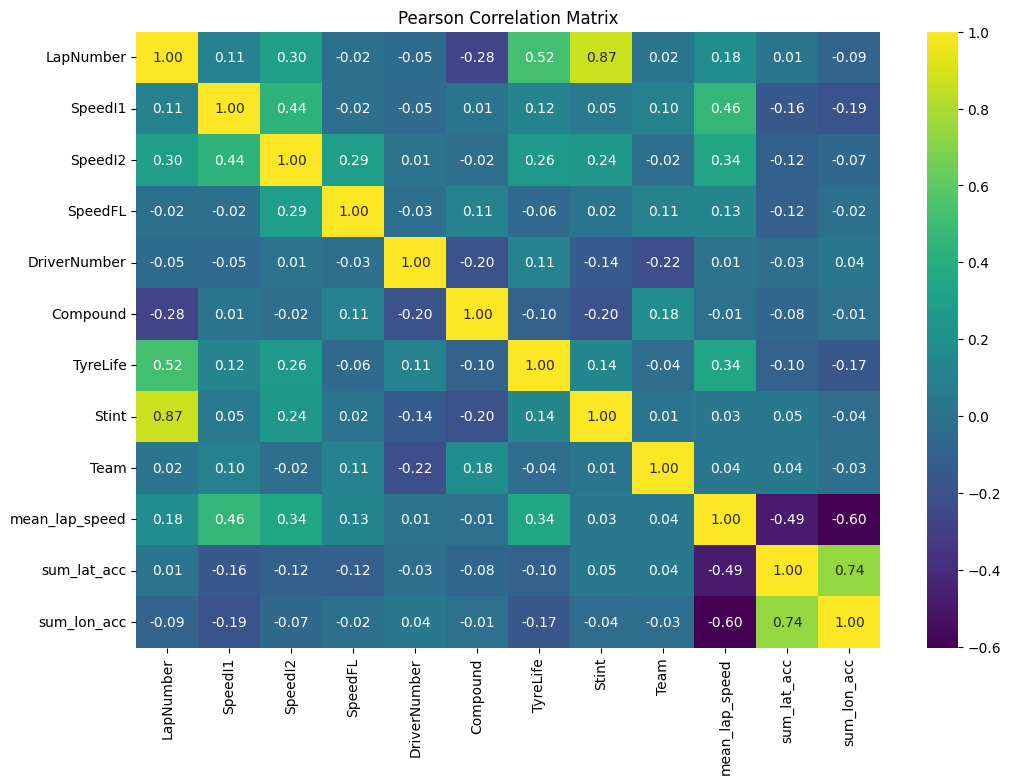

In [27]:
plt.figure(figsize=(12,8))

corr = X_c.corr()

sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")

plt.title("Pearson Correlation Matrix")

plt.show()

In [28]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled_c = StandardScaler().fit_transform(X_c)

# Split once, using indices
X_train_idx, X_test_idx = train_test_split(range(len(y)), test_size=0.2, random_state=42)

# Apply the split to both versions of X
X_train = X_scaled[X_train_idx]
X_test = X_scaled[X_test_idx]

X_train_c = X_scaled_c[X_train_idx]
X_test_c = X_scaled_c[X_test_idx]

y_train = y.iloc[X_train_idx]
y_test = y.iloc[X_test_idx]

Linear Regression

In [29]:
# Model 1
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred_1 = model1.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)

# Model 2
model2 = LinearRegression()
model2.fit(X_train_c, y_train)
y_pred_2 = model2.predict(X_test_c)
mse_2 = mean_squared_error(y_test, y_pred_2)

print(f"Model 1 MSE (original features): {mse_1:.3f}")
print(f"Model 2 MSE (new features): {mse_2:.3f}")

Model 1 MSE (original features): 0.894
Model 2 MSE (new features): 0.868


In [30]:
print("Model 1 coefficients:", model1.coef_)
print("Model 2 coefficients:", model2.coef_)

Model 1 coefficients: [ 0.16767569 -0.04236916 -0.09204951  0.01530636 -0.02594719 -0.21123731
 -0.10435759  0.27644781  0.01589156 -6.81125343]
Model 2 coefficients: [ 1.32648220e-01 -4.48636537e-02 -8.52537166e-02  2.62407554e-02
 -2.01395977e-02 -1.98674042e-01 -9.80470428e-02  2.92172138e-01
  1.80539487e-03 -6.75861316e+00  1.97464151e-01 -7.32657481e-02]


In [31]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(LinearRegression(), X_scaled, y, scoring='neg_mean_squared_error', cv=5)
scores2 = cross_val_score(LinearRegression(), X_scaled_c, y, scoring='neg_mean_squared_error', cv=5)

print(f"Model 1 CV MSE: {-scores1.mean():.3f}")
print(f"Model 2 CV MSE: {-scores2.mean():.3f}")

Model 1 CV MSE: 1.062
Model 2 CV MSE: 1.055


Decision Tree


In [32]:
tree_model = DecisionTreeRegressor(random_state=12)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree MSE: {mse_tree:.3f}")

tree_model = DecisionTreeRegressor(random_state=12)
tree_model.fit(X_train_c, y_train)
y_pred_tree_c = tree_model.predict(X_test_c)
mse_tree = mean_squared_error(y_test, y_pred_tree_c)
print(f"Decision Tree MSE with additional data: {mse_tree:.3f}")

Decision Tree MSE: 0.566
Decision Tree MSE with additional data: 0.568


In [33]:
from functools import partial

def objective(trial, X_train, y_train, X_test, y_test):
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    tree = DecisionTreeRegressor(
        random_state=12,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse

objective_with_data = partial(objective, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

print("\nOptimizing Decision Tree with Optuna...")
study = optuna.create_study(direction="minimize", storage="sqlite:///db.sqlite3", )
study.optimize(objective_with_data, n_trials=30)

print("Best parameters:", study.best_params)
print(f"Best Decision Tree MSE: {study.best_value:.3f}")

objective_with_data = partial(objective, X_train=X_train_c, y_train=y_train, X_test=X_test_c, y_test=y_test)

print("\nOptimizing Decision Tree with Optuna...")
study = optuna.create_study(direction="minimize", storage="sqlite:///db.sqlite3", )
study.optimize(objective_with_data, n_trials=30)

print("Best parameters with additional data:", study.best_params)
print(f"Best Decision Tree MSE with additional data: {study.best_value:.3f}")


Optimizing Decision Tree with Optuna...


[I 2025-06-05 00:16:58,348] A new study created in RDB with name: no-name-930d0b13-ce4a-4506-a7e3-af6136b38486
[I 2025-06-05 00:16:58,444] Trial 0 finished with value: 0.8794969431451183 and parameters: {'max_depth': 6, 'min_samples_split': 17, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8794969431451183.
[I 2025-06-05 00:16:58,522] Trial 1 finished with value: 0.9610035253331585 and parameters: {'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8794969431451183.
[I 2025-06-05 00:16:58,584] Trial 2 finished with value: 2.352742075460364 and parameters: {'max_depth': 2, 'min_samples_split': 18, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8794969431451183.
[I 2025-06-05 00:16:58,647] Trial 3 finished with value: 0.44624858416459506 and parameters: {'max_depth': 9, 'min_samples_split': 16, 'min_samples_leaf': 6}. Best is trial 3 with value: 0.44624858416459506.
[I 2025-06-05 00:16:58,713] Trial 4 finished with value: 0.4461

Best parameters: {'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 6}
Best Decision Tree MSE: 0.392

Optimizing Decision Tree with Optuna...


[I 2025-06-05 00:17:01,068] Trial 2 finished with value: 0.9059287883547464 and parameters: {'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.3951918802392632.
[I 2025-06-05 00:17:01,137] Trial 3 finished with value: 0.4772613031477213 and parameters: {'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.3951918802392632.
[I 2025-06-05 00:17:01,203] Trial 4 finished with value: 0.7959727026460622 and parameters: {'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.3951918802392632.
[I 2025-06-05 00:17:01,270] Trial 5 finished with value: 0.44850431511164573 and parameters: {'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.3951918802392632.
[I 2025-06-05 00:17:01,336] Trial 6 finished with value: 0.42638927281046696 and parameters: {'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 3}. Best is trial 

Best parameters with additional data: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}
Best Decision Tree MSE with additional data: 0.395


DTW

In [34]:
session = fastf1.get_session(2023, 'Bahrain', 'Q')
session.load(telemetry=True)

In [35]:
q_lap = session.laps.pick_driver('VER').pick_fastest().get_telemetry()
q_lap['DriverNumber'] = 1.0
q_lap['LapNumber'] = 1.0

c:\Users\pat79\AppData\Local\Programs\Python\Python313\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [ ]:
q_lap = TelemetryProcessing(q_lap)

q_lap.compute_accelerations()
q_lap.data

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Y,Z,DriverNumber,LapNumber,lon_acc,lat_acc,abs_lat_acc,abs_lon_acc,sum_lat_acc,sum_lon_acc
2,2023-03-04 16:07:25.761,0 days 01:22:24.764000,,1396.081389,0 days 00:00:00,10664.421894,292.312499,7,100.0,False,...,1265.072445,-159.000000,1.0,1.0,0.35217,0.11610,0.11610,0.35217,865.4447,525.38095
3,2023-03-04 16:07:25.858,0 days 01:22:24.861000,,1396.081389,0 days 00:00:00.097000,10635.018789,293.524998,7,100.0,False,...,1366.000000,-159.000000,1.0,1.0,0.17642,0.07690,0.07690,0.17642,865.4447,525.38095
4,2023-03-04 16:07:26.056,0 days 01:22:25.059000,,1396.081389,0 days 00:00:00.295000,10575.000000,296.000000,8,100.0,False,...,1642.602047,-159.000000,1.0,1.0,0.21506,0.03091,0.03091,0.21506,865.4447,525.38095
5,2023-03-04 16:07:26.058,0 days 01:22:25.061000,,1396.081389,0 days 00:00:00.297000,10575.747616,296.012460,8,100.0,False,...,1645.000000,-159.000000,1.0,1.0,0.28316,0.04167,0.04167,0.28316,865.4447,525.38095
6,2023-03-04 16:07:26.377,0 days 01:22:25.380000,31,1396.081389,0 days 00:00:00.616000,10695.000000,298.000000,8,100.0,False,...,1842.825184,-158.999979,1.0,1.0,0.28316,0.10456,0.10456,0.28316,865.4447,525.38095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,2023-03-04 16:08:54.977,0 days 01:23:53.980000,31,1006.834444,0 days 00:01:29.216000,11373.000000,288.000000,7,100.0,False,...,997.158260,-159.017311,1.0,1.0,0.30447,-0.03713,0.03713,0.30447,865.4447,525.38095
652,2023-03-04 16:08:55.177,0 days 01:23:54.180000,31,998.390000,0 days 00:01:29.416000,11478.000000,290.000000,7,100.0,False,...,1145.962906,-159.070513,1.0,1.0,0.29857,-0.06347,0.06347,0.29857,865.4447,525.38095
653,2023-03-04 16:08:55.318,0 days 01:23:54.321000,31,992.279993,0 days 00:01:29.557000,11521.462415,291.516131,7,100.0,False,...,1251.000000,-159.000000,1.0,1.0,0.23596,-0.32912,0.32912,0.23596,865.4447,525.38095
654,2023-03-04 16:08:55.456,0 days 01:23:54.459000,31,986.300000,0 days 00:01:29.695000,11564.000000,293.000000,7,100.0,False,...,1366.035348,-158.813518,1.0,1.0,NaN,NaN,NaN,NaN,865.4447,525.38095


In [37]:
test_df = tel.data.copy()

In [38]:
test_lap = test_df[(test_df['DriverNumber'] == 1) & (test_df['LapNumber'] == 2.0) ]

In [41]:
from tslearn.metrics import dtw

distance = dtw(q_lap.data['lat_acc'], test_lap['lat_acc'])
distance

17.690048810339665

In [48]:
test_df = test_df[test_df['DriverNumber'] == 1]

In [61]:
laps = test_df['LapNumber'].unique()

In [63]:
ref_signal = q_lap.data['lat_acc']

results = []
for lap in laps:
    signal = test_df[test_df['LapNumber'] == float(lap)]['lat_acc']
    distance = dtw(signal, ref_signal)
    results.append({"lap": lap, "dtw_distance": distance})

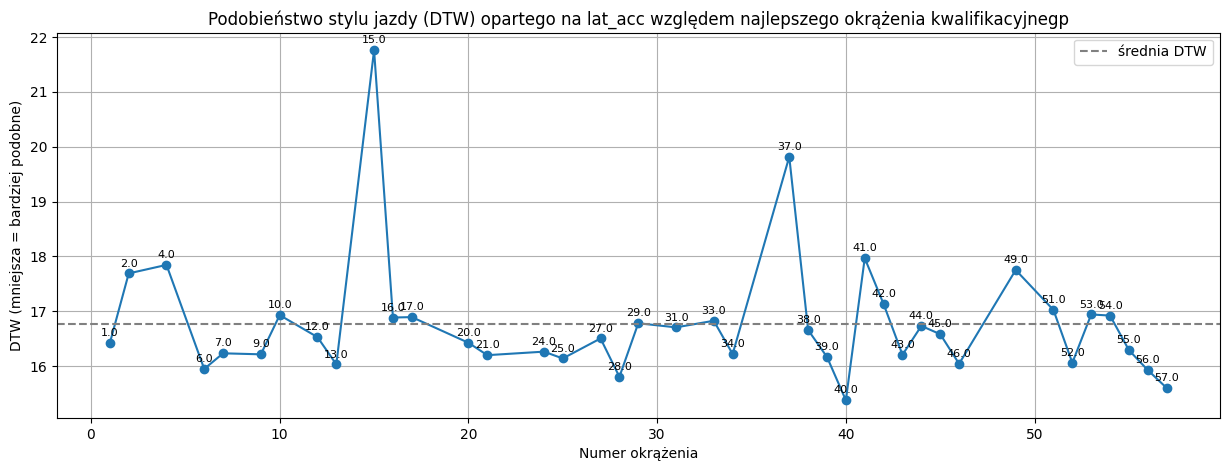

In [71]:
results_df = pd.DataFrame(results)
plt.figure(figsize=(15, 5))
plt.plot(results_df["lap"], results_df["dtw_distance"], marker="o")

for _, row in results_df.iterrows():
    plt.annotate(str(row["lap"]), (row["lap"], row["dtw_distance"]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.axhline(results_df["dtw_distance"].mean(), color="gray", linestyle="--", label="średnia DTW")
plt.title(f"Podobieństwo stylu jazdy (DTW) opartego na lat_acc względem najlepszego okrążenia kwalifikacyjnegp")
plt.xlabel("Numer okrążenia")
plt.ylabel("DTW (mniejsza = bardziej podobne)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sktime.transformations.panel.rocket import MiniRocket
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# X: np.array shape (n_samples, n_channels, series_length)

## to na potem, ja nie wiem co sie tu dzieje nawet

rocket = MiniRocket()
X_feat = rocket.fit_transform(X_test_c)  # shape: (n_samples, n_features)

# Klasteryzacja
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_feat)

# Wizualizacja
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_feat)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis')
plt.title("Okrążenia zgrupowane na podstawie stylu jazdy")
plt.show()
